In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

# Q1

In [43]:
train = pd.read_csv(r'~/loans_full_schema.csv', encoding = 'latin-1')
train.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


Text(0.5, 0, 'Percent of NAs')

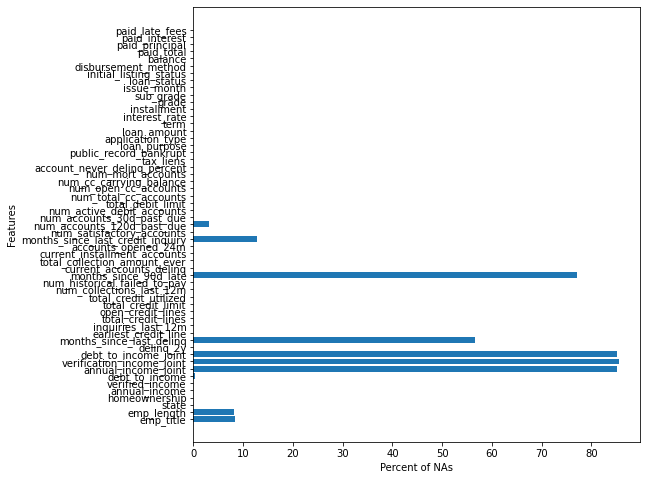

In [44]:
na = pd.DataFrame({"Percent_NAs": train.isnull().sum()/len(train.index)*100})

# Plot
fig = plt.figure(figsize=(8,8))  
plt.barh(na.index, na['Percent_NAs'])
plt.ylabel("Features")
plt.xlabel("Percent of NAs")

The dataset contain 55 variables and 5 of them have high percentage of NA values which are not helpful in providing information. 

In [45]:
train_new=train[['interest_rate', 'loan_amount','balance','paid_total','paid_principal','paid_interest','paid_late_fees','installment','term','total_debit_limit']]

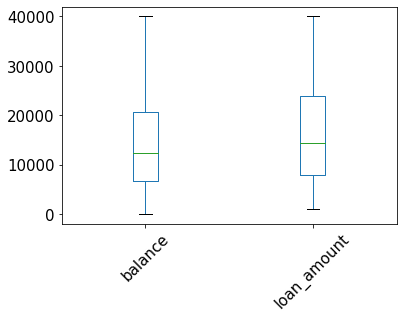

In [83]:
var = 'loan_amount'
data = pd.concat([train_new['balance'], train_new[var]], axis=1)
#f, ax = plt.subplots(figsize=(10, 10))
boxplot = data.boxplot(grid=False, rot=45, fontsize=15) 
#fig = sns.boxplot(x=var, y="interest_rate", data=data,palette="Blues")
#fig.axis(ymin=0, ymax=800000);

The balance and loan amount have simialr box plot and data distribution that in a range between 0 to 40000. The first and thrid quartile for loan_amount are wider than balance which are around 8000-13000 and 13000-23000.

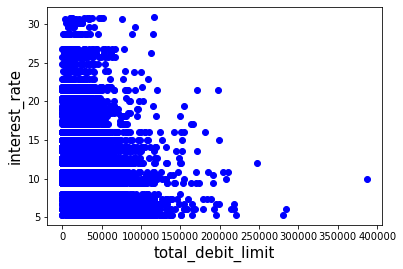

In [47]:
fig, ax = plt.subplots()
ax.scatter(x = train_new['total_debit_limit'], y = train_new['interest_rate'], color = 'blue')
plt.ylabel('interest_rate', fontsize=15)
plt.xlabel('total_debit_limit', fontsize=15)
plt.show()

The distribution of total_debit_limit and interest_rate have the negative realtionship that larger total_debit_limit tend to have lower interest rate.

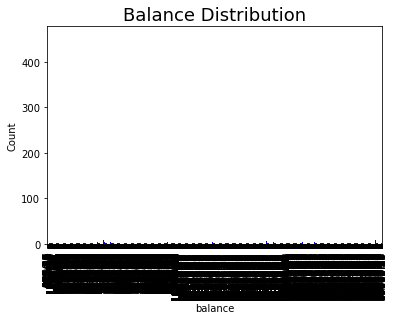

In [52]:
plot_vertical = train_new.groupby(['balance']).size()
p=plot_vertical.plot(kind='bar', color='blue')
plt.title('Balance Distribution', fontsize=18)
plt.ylabel('Count');

In [53]:
select = select[select['balance'].notna()]

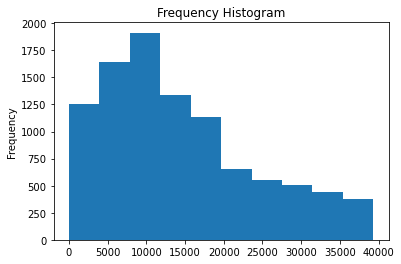

In [54]:
for i in range(len(select)):
    select["balance"].iloc[i]=int(select["balance"].iloc[i])
select.index = np.arange(1, len(select) + 1)
plt.hist(select["balance"])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

The frequency histogram shows the distribuion of the variable- balance. The most common balance is in the range of 7000-12000. 


 mu = 12.43 and sigma = 5.00



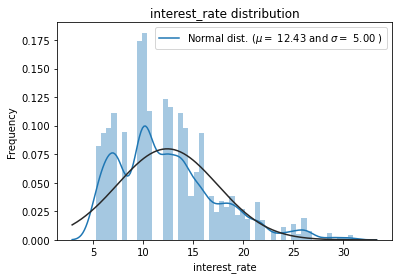

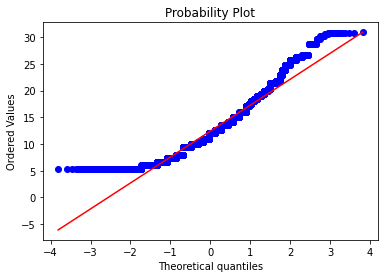

In [19]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
sns.distplot(train['interest_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['interest_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('interest_rate distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['interest_rate'], plot=plt)
plt.show()

Find the fitted parametter to fit the y variable to make it with less bias. 

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

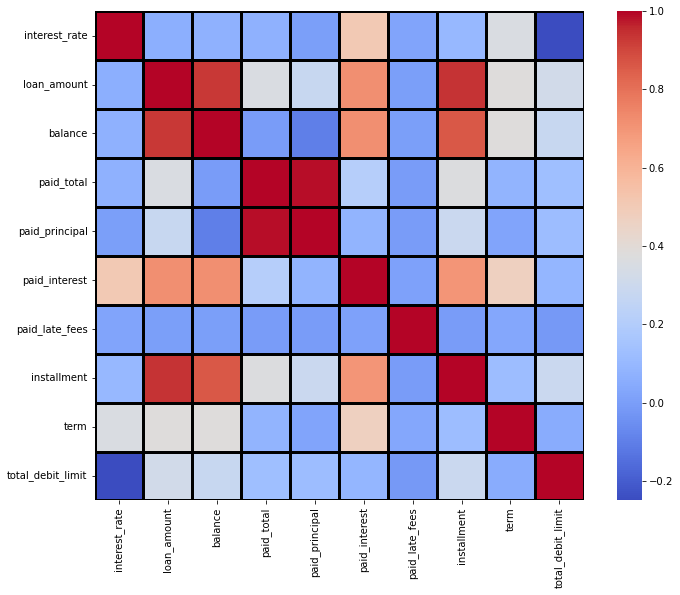

In [20]:
plt.figure(figsize=(10, 10))
cor = round(train_new.corr(),2)
plt.subplots(figsize=(12,9))
sns.heatmap(cor, cmap = 'coolwarm', linewidths=3, linecolor='black', square=True)

Loan_amount has high correlation (>0.8) with balance and installment which can be removed. Paid_total has high correlation with paid_principal as well, since paid_principal has lower corrlation with other variables, I choose to keep it and remove the other one.

## OLS Regression

In [58]:
import statsmodels.api as sm
xvar_rev=select[['balance','paid_principal','paid_interest','paid_late_fees','installment','term','total_debit_limit']]
xvar_rev=sm.add_constant(xvar_rev)
yvar_rev=select["interest_rate"]
ols_rev1=sm.OLS(yvar_rev,xvar_rev)
result_rev1=ols_rev1.fit(cov_type='HC1')
print(result_rev1.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2363.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        11:49:01   Log-Likelihood:                -24603.
No. Observations:                9822   AIC:                         4.922e+04
Df Residuals:                    9814   BIC:                         4.928e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2551      0.27

Since loan_amount and paid_total are removed from the data set, the regression summary indicates that interest_rate has nagative relationship with balance and paid_principal; while the rest hold postive relations. R-square here is 0.64 that more than half of the observed variation can be explained by the model's inputs and interest_rate is predictable.

The following are two linear models. The data cleaning process removes NA, does some variable checks, standardization, checks correlations and variable selections.

## Ridge

In [9]:
X_train = train_new[:train_new.shape[0]]
X_test = train_new[train_new.shape[0]:]
y = train.interest_rate

In [14]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [15]:
model_ridge = Ridge()

In [16]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

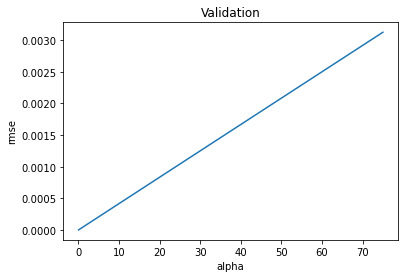

In [17]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [85]:
cv_ridge.min()

2.0841334679569122e-06

The main parameter for Ridge is alpha which measures how flexible the model is. The higher the regularization the less prone our model will be to overfit. When alpha is too large, the regularization will be strong that results the model cannot capture all the complexities in the data. However, the flexible model with small alpha let the model overfits. 

## Lasso

In [66]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [86]:
rmse_cv(model_lasso).mean()

9.761775731916403e-05

In [67]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)


In [68]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 2 variables


In [69]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

<AxesSubplot:xlabel='preds', ylabel='residuals'>

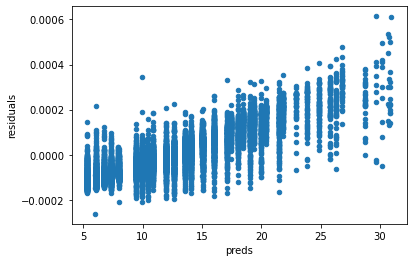

In [79]:
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Compared with two models, Ridge perfoms better than Lasso with a lower rmse. The Lasso model here has relatively high residuals as the preds get increase. For the next step, I will try to grab the most important positive or negative features and deal with unbalanced variable issues.

# Q2

In [45]:
df = pd.read_csv(r'~/casestudy.csv', encoding = 'latin-1')
df.head(5)

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


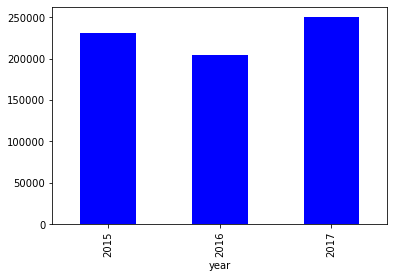

In [46]:
plot_vertical = df.groupby(['year']).size()
p=plot_vertical.plot(kind='bar', color='blue')

In [47]:
#Total revenue for the current year (#2017 in this case)
df.query('year == 2017')['net_revenue'].sum()

31417495.030000016

In [48]:
a=df.query('year == 2017')[['customer_email','net_revenue']]
b=df.query('year == 2016')[['customer_email','net_revenue']]

In [60]:
c=df.query('year == 2017 and year != 2016')[['customer_email','net_revenue']]
c

,customer_email,net_revenue
435940,mwrossuukz@gmail.com,96.61
435941,qvjfterwnk@gmail.com,176.00
435942,vlyigtgfzs@gmail.com,73.47
435943,yfirychuhk@gmail.com,138.17
435944,fdkiioqtli@gmail.com,156.87
...,...,...
685922,qzqttwiftu@gmail.com,184.58
685923,pjodiifjop@gmail.com,133.03
685924,appaplmgko@gmail.com,200.98
685925,wvkpmwsgck@gmail.com,235.35


In [61]:
#New Customer Revenue
c.sum()

customer_email    mwrossuukz@gmail.comqvjfterwnk@gmail.com  vlyi...
net_revenue                                             31417495.03
dtype: object

In [49]:
A=pd.concat([a, b], axis=1)
A

,customer_email,net_revenue,customer_email,net_revenue
435940,mwrossuukz@gmail.com,96.61,NaN,NaN
435941,qvjfterwnk@gmail.com,176.00,NaN,NaN
435942,vlyigtgfzs@gmail.com,73.47,NaN,NaN
435943,yfirychuhk@gmail.com,138.17,NaN,NaN
435944,fdkiioqtli@gmail.com,156.87,NaN,NaN
...,...,...,...,...
435935,NaN,NaN,mezrjfkced@gmail.com,114.17
435936,NaN,NaN,rdotspqdxi@gmail.com,169.79
435937,NaN,NaN,fkweqlmmjw@gmail.com,79.71
435938,NaN,NaN,pidugzoeej@gmail.com,116.80


In [74]:
df_difference = pd.merge(a,b, how='outer', indicator=True)
df_difference

df_new = df_difference[df_difference['_merge'] =='left_only']
df_old = df_difference[df_difference['_merge'] =='right_only']
df_both=df_difference[df_difference['_merge'] =='both']

In [53]:
df_new

,customer_email,net_revenue,_merge
0,mwrossuukz@gmail.com,96.61,left_only
1,qvjfterwnk@gmail.com,176.00,left_only
2,vlyigtgfzs@gmail.com,73.47,left_only
3,yfirychuhk@gmail.com,138.17,left_only
4,fdkiioqtli@gmail.com,156.87,left_only
...,...,...,...
249982,qzqttwiftu@gmail.com,184.58,left_only
249983,pjodiifjop@gmail.com,133.03,left_only
249984,appaplmgko@gmail.com,200.98,left_only
249985,wvkpmwsgck@gmail.com,235.35,left_only


In [54]:
#New Customer Revenue
df_new['net_revenue'].sum()

31417330.350000005

In [55]:
df_old

,customer_email,net_revenue,_merge
249987,mwrossuukz@gmail.com,197.26,right_only
249988,gkwsoupawk@gmail.com,38.28,right_only
249989,vlyigtgfzs@gmail.com,154.57,right_only
249990,yfirychuhk@gmail.com,102.47,right_only
249991,trnzgqinuu@gmail.com,32.03,right_only
...,...,...,...
454626,mezrjfkced@gmail.com,114.17,right_only
454627,rdotspqdxi@gmail.com,169.79,right_only
454628,fkweqlmmjw@gmail.com,79.71,right_only
454629,pidugzoeej@gmail.com,116.80,right_only


In [56]:
#Revenue lost from attrition
df_old['net_revenue'].sum()

25730778.91

In [20]:
#Existing Customer Growth
df.query('year == 2017')['net_revenue'].sum()-df.query('year == 2016')['net_revenue'].sum()

5686551.440000016

In [33]:
#Existing Customer Revenue Current Year
df.query('year == 2017')['net_revenue'].sum()

31417495.030000016

In [32]:
#Existing Customer Revenue Prior Year
df.query('year == 2016')['net_revenue'].sum()

25730943.59

In [21]:
#Total Customers Current Year 2017
df.query('year == 2017')['customer_email'].nunique()

249987

In [22]:
#Total Customers Previous Year 2016
df.query('year == 2016')['customer_email'].nunique()

204646

In [23]:
a1=df.query('year == 2017')[['customer_email']]
b1=df.query('year == 2016')[['customer_email']]

df_difference = pd.merge(a1,b1, how='outer', indicator=True)
df_new = df_difference[df_difference['_merge'] =='left_only']
df_old = df_difference[df_difference['_merge'] =='right_only']
df_both = df_difference[df_difference['_merge'] =='both']

In [24]:
#New Customers
df_new

,customer_email,_merge
0,mwrossuukz@gmail.com,left_only
1,qvjfterwnk@gmail.com,left_only
2,vlyigtgfzs@gmail.com,left_only
3,yfirychuhk@gmail.com,left_only
4,fdkiioqtli@gmail.com,left_only
...,...,...
249982,qzqttwiftu@gmail.com,left_only
249983,pjodiifjop@gmail.com,left_only
249984,appaplmgko@gmail.com,left_only
249985,wvkpmwsgck@gmail.com,left_only


In [25]:
#Old Customers
df_old

,customer_email,_merge
249987,mwrossuukz@gmail.com,right_only
249988,gkwsoupawk@gmail.com,right_only
249989,vlyigtgfzs@gmail.com,right_only
249990,yfirychuhk@gmail.com,right_only
249991,trnzgqinuu@gmail.com,right_only
...,...,...
433669,sqodpufunf@gmail.com,right_only
433670,mezrjfkced@gmail.com,right_only
433671,rdotspqdxi@gmail.com,right_only
433672,pidugzoeej@gmail.com,right_only
